In [1]:
from sklearn.model_selection import train_test_split
import warnings
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

warnings.filterwarnings('ignore')


In [2]:
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Пропуски есть в Age, Cabin, Embarked

Посмотрим на боксплоты

<AxesSubplot:>

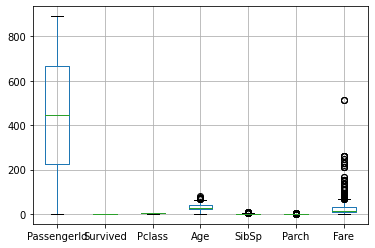

In [5]:
train.boxplot()

In [6]:
train.loc[train['Fare'] > 400]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C


Не является выбросом, других выбросов нет

Анализируем пропуски. Всего 891 строк в датасете

In [7]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


В cabin пропущено 77,1% значений, этот признак можно удалить

In [8]:
train = train.drop('Cabin', axis = 1)

В Embarked пропущено всего 2 значения, заполним самым популярным

In [9]:
print(train['Embarked'].unique())
print("S =", train.loc[train['Embarked'] == 'S'].count()[0])
print("C =", train.loc[train['Embarked'] == 'C'].count()[0])
print("Q =", train.loc[train['Embarked'] == 'Q'].count()[0])

['S' 'C' 'Q' nan]
S = 644
C = 168
Q = 77


In [10]:
train = train.fillna({"Embarked": "S"})

Age заполним средним значением

In [11]:
avr = train['Age'].mean()
train = train.fillna({"Age": avr})


Посмотрим на корреляцию признаков

<AxesSubplot:>

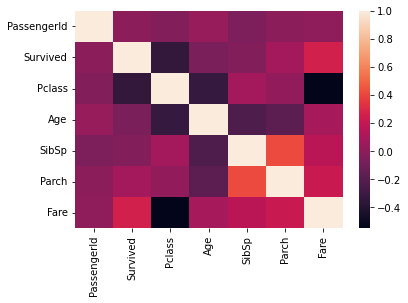

In [12]:
corMx = train.corr()
sns.heatmap(corMx)

PassengerId, Ticket и Name удалим из датасета. Признаки, которые почти не коррелируют - SibSp, Age, их тоже удалим

In [13]:
train = train.drop(['PassengerId', 'Ticket', 'Name'], axis=1)

Посмотрим, что осталось

In [14]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


Закодируем признаки Sex и Embarked

In [15]:
from sklearn.preprocessing import LabelEncoder

cols = ['Sex', 'Embarked']
le = LabelEncoder()
for i in cols:
    train[i] = le.fit_transform(train[i])

train.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2


Таргет - Survived. Разобьем выборку

In [16]:
y = train['Survived']
X = train.drop('Survived', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

Добавим словарь с результатами

In [17]:
results = {}

## kNN

No handles with labels found to put in legend.


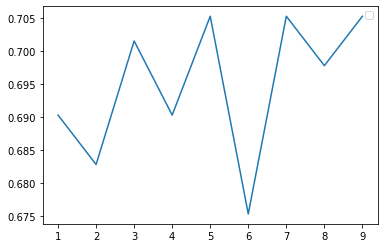

In [18]:
from sklearn.neighbors import KNeighborsClassifier

neibs = np.arange(1, 10)
accuracy = np.zeros(len(neibs))
for i, k in enumerate(neibs):
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    accuracy[i] = clf.score(X_test, y_test)

plt.plot(neibs, accuracy)
plt.legend()
plt.show()

In [19]:
clf = KNeighborsClassifier(n_neighbors=7, metric='manhattan')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.7276119402985075

In [20]:
clf = KNeighborsClassifier(n_neighbors=7, metric='minkowski')
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.7052238805970149

In [21]:
results["kNN k = 7 metric=minkowski"] = clf.score(X_test, y_test)

## Логистическая регрессия

In [41]:
from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(penalty='l1')
# lr.fit(X_train, y_train)
# score = lr.score(X_test, y_test)
# print('l1', score)

lr = LogisticRegression(penalty='l2')
lr.fit(X_train, y_train)
score = lr.score(X_test, y_test)
print('l2', score)

# lr = LogisticRegression(penalty='elasticnet')
# lr.fit(X_train, y_train)
# score = lr.score(X_test, y_test)
# print('elasticnet', score)

lr1 = LogisticRegression(penalty='none')
lr1.fit(X_train, y_train)
score1 = lr1.score(X_test, y_test)
print('none', score1)


l2 0.7910447761194029
none 0.7910447761194029


In [23]:
results["LogisticRegression penalty=none"] = score

## Дерево решений

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

for i in range(1, 10):
    dtc = DecisionTreeClassifier(criterion='entropy', max_depth=i)
    dtc.fit(X_train, y_train)
    y_pred = dtc.predict(X_test)
    print("глубина", i, "f1-мера", f1_score(y_test, y_pred))


глубина 1 f1-мера 0.7358490566037735
глубина 2 f1-мера 0.6514285714285714
глубина 3 f1-мера 0.7536231884057971
глубина 4 f1-мера 0.7609756097560975
глубина 5 f1-мера 0.7487684729064039
глубина 6 f1-мера 0.6740331491712707
глубина 7 f1-мера 0.6772486772486772
глубина 8 f1-мера 0.6528497409326425
глубина 9 f1-мера 0.6666666666666666


In [25]:
dtc = DecisionTreeClassifier(criterion='entropy', max_depth=7)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
f1_score(y_test, y_pred)


0.6772486772486772

In [26]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=7)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
f1_score(y_test, y_pred)


0.6875

In [42]:
dtc = DecisionTreeClassifier(criterion='gini', max_depth=5)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
f1_score(y_test, y_pred)


0.6994535519125683

In [27]:
results["DecisionTree criterion=gini"] = f1_score(y_test, y_pred)

## Метод опорных векторов

In [28]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
score = svc.score(X_test, y_test)
print(score)

svc = SVC(kernel='poly')
svc.fit(X_train, y_train)
score = svc.score(X_test, y_test)
print(score)

svc = SVC(kernel='rbf')
svc.fit(X_train, y_train)
score = svc.score(X_test, y_test)
print(score)

svc = SVC(kernel='sigmoid')
svc.fit(X_train, y_train)
score = svc.score(X_test, y_test)
print(score)


0.7910447761194029
0.6119402985074627
0.6567164179104478
0.6082089552238806


In [29]:
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
score = svc.score(X_test, y_test)
results["SVC kernel=linear"] = score

## Стеккинг

kNN + lr

In [30]:
from sklearn.ensemble import StackingClassifier
estimators = [('knn', KNeighborsClassifier()),
              ('lr', LogisticRegression())]
clf = StackingClassifier(estimators=estimators, final_estimator=SVC())
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3, random_state=12)
clf.fit(X_train, y_train)
score = clf.score(X_valid, y_valid)
print(score)


0.7910447761194029


kNN + dt

In [31]:
estimators = [('knn', KNeighborsClassifier()),
              ('dt', DecisionTreeClassifier())]
clf_2 = StackingClassifier(estimators=estimators, final_estimator=SVC())
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.3, random_state=12)
clf_2.fit(X_train, y_train)
score = clf_2.score(X_valid, y_valid)
print(score)


0.7574626865671642


kNN + lr + dt

In [32]:
estimators = [('knn', KNeighborsClassifier()),
              ('dt', DecisionTreeClassifier()),
              ('lr', LogisticRegression())]
clf_3 = StackingClassifier(estimators=estimators, final_estimator=SVC())
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)
clf_3.fit(X_train, y_train)
score = clf_3.score(X_test, y_test)
print(score)


0.7649253731343284


In [33]:
results['Stacking knn+dt+lr'] = score

## Беггинг

In [34]:
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

clf = BaggingClassifier(base_estimator=RandomForestClassifier(), n_estimators=10, random_state=0)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)


0.7761194029850746

In [35]:
from sklearn.ensemble import ExtraTreesClassifier

clf_1 = BaggingClassifier(base_estimator=ExtraTreesClassifier(), n_estimators=10, random_state=0)
clf_1.fit(X_train, y_train)
clf_1.score(X_test, y_test)


0.7649253731343284

In [45]:
clf_1 = BaggingClassifier(
    base_estimator=LogisticRegression(), n_estimators=10, random_state=0)
clf_1.fit(X_train, y_train)
sc = clf_1.score(X_test, y_test)


In [44]:
clf_1 = BaggingClassifier(
    base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=0)
clf_1.fit(X_train, y_train)
clf_1.score(X_test, y_test)


0.667910447761194

In [46]:
results["Baggind+LR"] = sc

## Бустинг

Адаптивный

In [37]:
from sklearn.ensemble import AdaBoostClassifier

clf_adaboost = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(
    max_depth=2), n_estimators=100, random_state=12)

clf_adaboost.fit(X_train, y_train)
score = clf_adaboost.score(X_test, y_test)
print(score)

0.7798507462686567


Градиентный

In [47]:
from sklearn.ensemble import GradientBoostingClassifier

clf_grboost = GradientBoostingClassifier(
    max_depth=2, n_estimators=100, random_state=12, learning_rate=1)
clf_grboost.fit(X_train, y_train)
sc1 = clf_grboost.score(X_test, y_test)
print(sc1)


0.7947761194029851


In [48]:
results['Gradient'] = sc1

## Лучшие результаты по категориям

In [49]:
results

{'kNN k = 7 metric=minkowski': 0.7052238805970149,
 'LogisticRegression penalty=none': 0.8134328358208955,
 'DecisionTree criterion=gini': 0.6875,
 'SVC kernel=linear': 0.7910447761194029,
 'Stacking knn+dt+lr': 0.7649253731343284,
 'Baggind+ExtraTrees': 0.7649253731343284,
 'Adaboost': 0.7798507462686567,
 'Baggind+LR': 0.7761194029850746,
 'Gradient': 0.7947761194029851}